In [1]:
## supress warnings
import warnings
warnings.filterwarnings('ignore')

<font size ='4'> 
Importing necessary libraries 
<font/>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler,OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

<font size ='4'> 
Importing our dataset
<font/>

In [3]:
df = pd.read_csv("flightPrice.csv")

In [4]:
df.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [5]:
df.tail()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
452083,2023-03-06,Monday,Vistara,UK-926,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,13.0833,50,65028
452084,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452085,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452086,2023-03-06,Monday,Vistara,UK-946,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,72980
452087,2023-03-06,Monday,Vistara,UK-946,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,72980


We will take a look at the columns and analyze each columnn  to get insights from them

In [6]:
df.columns

Index(['Date_of_journey', 'Journey_day', 'Airline', 'Flight_code', 'Class',
       'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination',
       'Duration_in_hours', 'Days_left', 'Fare'],
      dtype='object')

In [7]:
df.dtypes

Date_of_journey       object
Journey_day           object
Airline               object
Flight_code           object
Class                 object
Source                object
Departure             object
Total_stops           object
Arrival               object
Destination           object
Duration_in_hours    float64
Days_left              int64
Fare                   int64
dtype: object

From the below we notice that the column for date of journey span across 50 unique dates.

In [8]:
df["Date_of_journey"].nunique()

50

From the below we notice that people fly everyday of the week with most people flying  frequently on Mondays 

In [9]:
df.groupby('Journey_day').size()

Journey_day
Friday       63932
Monday       72220
Saturday     62517
Sunday       62150
Thursday     64187
Tuesday      63402
Wednesday    63680
dtype: int64

We have nine different airlines in our dataset  and Vistara airline has the highest number of people flying with them

In [10]:
df.groupby("Airline").size()

Airline
Air India      119841
AirAsia         15764
AkasaAir         2230
AllianceAir       393
GO FIRST        10786
Indigo          65659
SpiceJet         5863
StarAir            62
Vistara        231490
dtype: int64

We have 1405 unique flight codes

In [11]:
df['Flight_code'].nunique()

1405

We have four different classes for the airlines with Economy being the highest

In [12]:
df.groupby('Class').size()

Class
Business           126834
Economy            252033
First                 144
Premium Economy     73077
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    452088 non-null  object 
 1   Journey_day        452088 non-null  object 
 2   Airline            452088 non-null  object 
 3   Flight_code        452088 non-null  object 
 4   Class              452088 non-null  object 
 5   Source             452088 non-null  object 
 6   Departure          452088 non-null  object 
 7   Total_stops        452088 non-null  object 
 8   Arrival            452088 non-null  object 
 9   Destination        452088 non-null  object 
 10  Duration_in_hours  452088 non-null  float64
 11  Days_left          452088 non-null  int64  
 12  Fare               452088 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 44.8+ MB


We have 7 different source cities  with Delhi being the most frequent source

In [14]:
df.groupby('Source').size()

Source
Ahmedabad    46106
Bangalore    73375
Chennai      56514
Delhi        83153
Hyderabad    56657
Kolkata      55560
Mumbai       80723
dtype: int64

We have 4 different depature times 

In [15]:
df['Departure'].nunique()

4

The most frequent depature time is 6AM-12PM

In [16]:
df.groupby('Departure').size()

Departure
12 PM - 6 PM    115774
6 AM - 12 PM    184980
After 6 PM      127969
Before 6 AM      23365
dtype: int64

from below we can notice that we have 3 different stops for  airlines

In [17]:
df['Total_stops'].unique()

array(['non-stop', '1-stop', '2+-stop'], dtype=object)

We have four different timeslots for arrivals

In [18]:
df['Arrival'].unique()

array(['After 6 PM', 'Before 6 AM', '6 AM - 12 PM', '12 PM - 6 PM'],
      dtype=object)

We have 7 different destination cities with Mumbai being the most frequent destination city

In [19]:
df.groupby('Destination').size()

Destination
Ahmedabad    44435
Bangalore    72344
Chennai      57589
Delhi        77739
Hyderabad    62539
Kolkata      54447
Mumbai       82995
dtype: int64

The flight duration ranges from 0.75 to 43.583 in hours

In [20]:
min_duration = df['Duration_in_hours'].min()
max_duration = df['Duration_in_hours'].max()

print(max_duration)
print(min_duration)

43.5833
0.75


Number of days left until the flight ranges from 1 to 50.

In [21]:
min_of_days_left = df['Days_left'].min()
max_of_days_left =df['Days_left'].max()

print(min_of_days_left)
print(max_of_days_left)

1
50


The fare ranges from 1307 to 143019

In [22]:
min_fare = df['Fare'].min()
max_fare =df['Fare'].max()

print(min_fare)
print(max_fare)


1307
143019


From the graph we notice that the fare distribution is right-skewed  which shows that most fares have lower prices with some high prices as outliers

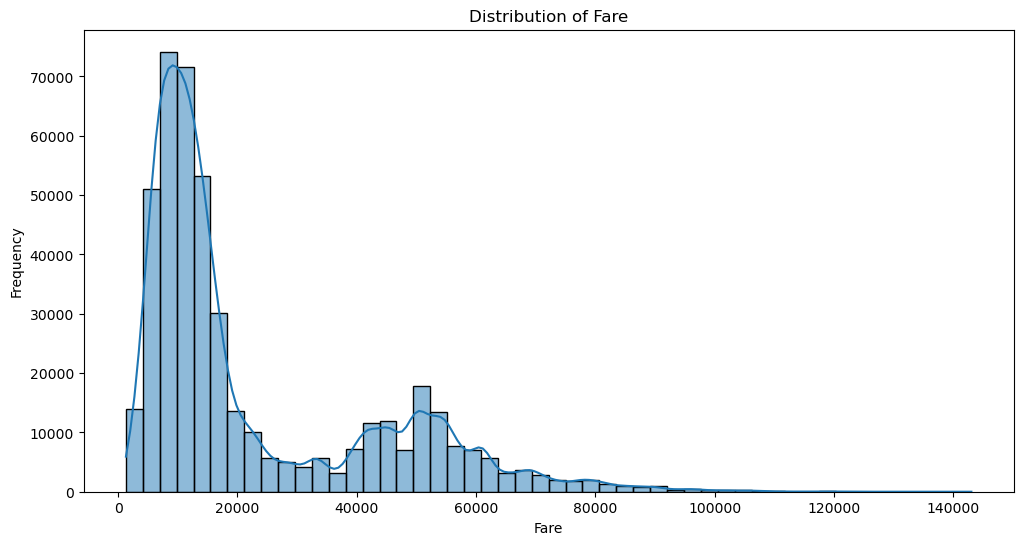

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Fare'], kde=True, bins=50)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

The flight duration is normally distributed with peak within the 10-15 hours range  and fewer flights taking longer duration

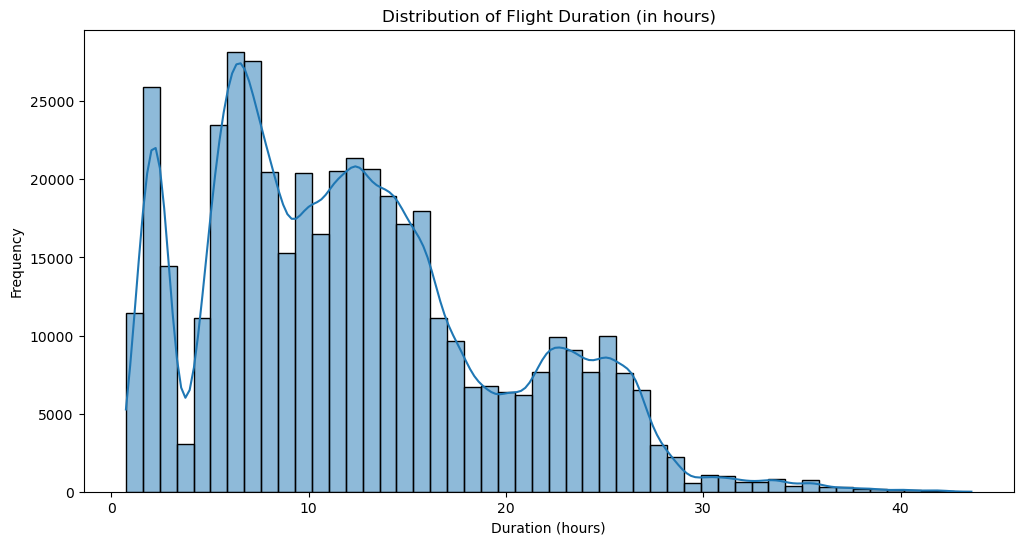

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Duration_in_hours'], kde=True, bins=50)
plt.title('Distribution of Flight Duration (in hours)')
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.show()

There's a noticeable difference in fare prices across different airlines. 
Some airlines have a wider range of fares, this suggest they might have different  types of services or routes they offer.

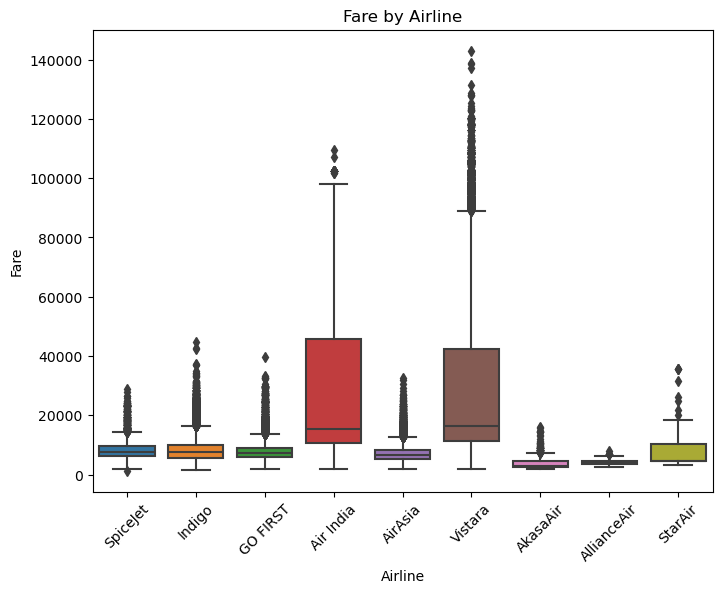

In [25]:
# Box plot of Fare vs. Airline
plt.figure(figsize=(8, 6))
sns.boxplot(x='Airline', y='Fare', data=df)
plt.title('Fare by Airline')
plt.xlabel('Airline')
plt.ylabel('Fare')
plt.xticks(rotation=45)
plt.show()

Vistara and Air India have the highest number of flights in the dataset.

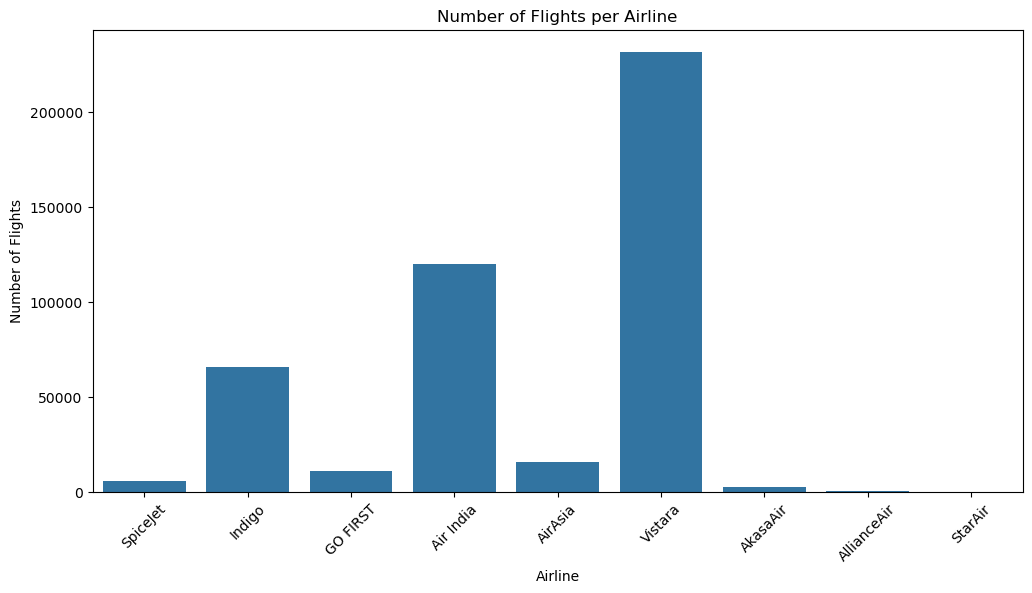

In [26]:
# Bar plot of number of flights per Airline
plt.figure(figsize=(12, 6))
sns.countplot(x='Airline', data=df, color='#1f77b4')
plt.title('Number of Flights per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

The majority of flights are in the Economy class, followed by   Business, Premium Economy and First class.

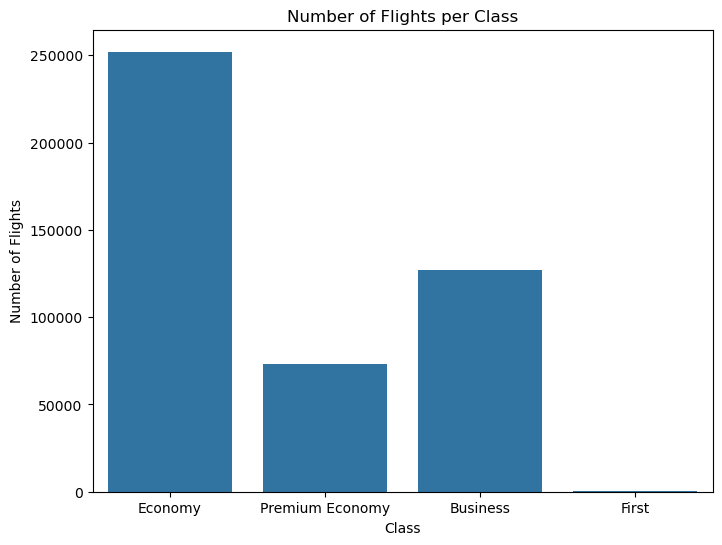

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, color='#1f77b4') 
plt.title('Number of Flights per Class')
plt.xlabel('Class')
plt.ylabel('Number of Flights')
plt.show()


BIVARITE ANALYSIS

Fare vs Airline 
From the box plot below  Air India and Vistara have the highest mean fares, suggesting they might cater to a higher-end market or offer more premium services.
AirAsia, AkasaAir, and AllianceAir have lower mean fares, indicating they might be budget airlines.
Indigo and SpiceJet fall in the mid-range category, with fares that are higher than budget airlines but lower than premium ones.


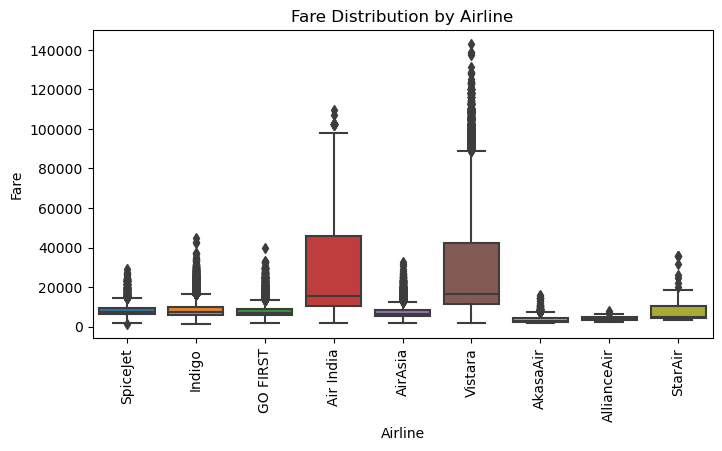

In [28]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Airline', y='Fare', data=df)
plt.xticks(rotation=90)
plt.title('Fare Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Fare')
plt.show()


Fare vs Class 
From the plot below, First Class has the highest mean fare, followed closely by Business Class.
Premium Economy fares are significantly lower than Business and First Class but higher than Economy.
Economy Class has the lowest fares, as expected.

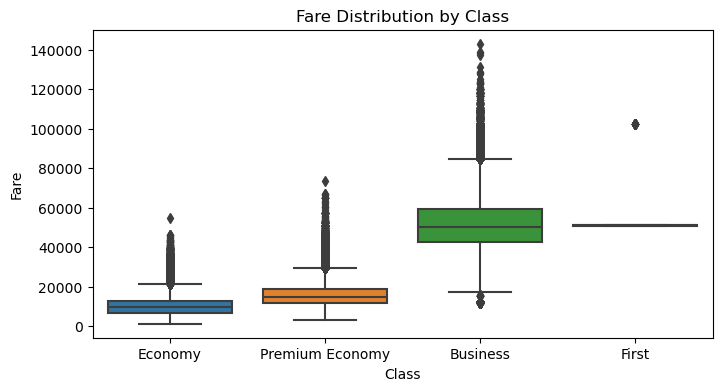

In [29]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Class', y='Fare', data=df)
plt.title('Fare Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.show()

The distribution shows that most flights have durations clustered around 12 hours, with a few longer durations extending up to 43.58 hours.

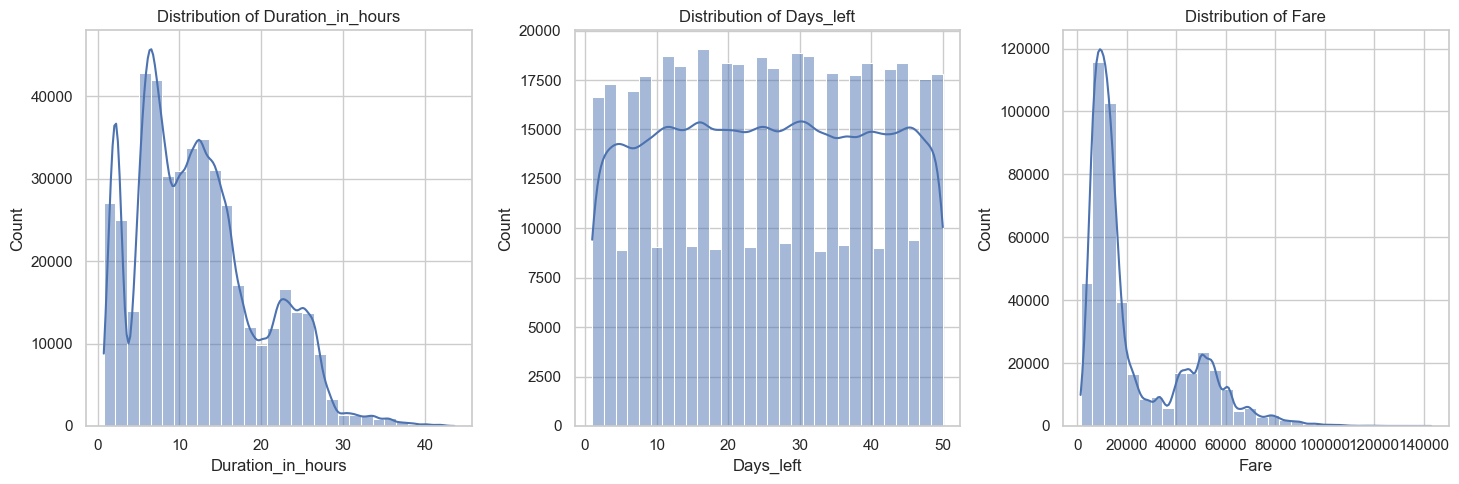

,Duration_in_hours,Days_left,Fare
count,452088.000000,452088.000000,452088.000000
mean,12.349222,25.627902,22840.100890
std,7.431478,14.300846,20307.963002
min,0.750000,1.000000,1307.000000
25%,6.583300,13.000000,8762.750000
50%,11.333300,26.000000,13407.000000
75%,16.500000,38.000000,35587.000000
max,43.583300,50.000000,143019.000000


In [32]:

sns.set(style="whitegrid")

numerical_cols = ['Duration_in_hours', 'Days_left', 'Fare']

numerical_stats = df[numerical_cols].describe()

plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

numerical_stats


Lets check the correlation between the numerical values

In [ ]:
# Compute the correlation matrix
correlation_matrix = df[['Duration_in_hours', 'Days_left', 'Fare']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
#checking for  columns with missing data
df.isnull().sum()

<font size ='4'>
Spliting the dataset into train and test by 70-30 
<font/>

In [ ]:
X_col = df.columns[df.columns != 'Fare'].tolist()
y_col = 'Fare'
X = df[X_col]
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(df[X_col],df[y_col],train_size=0.70,test_size=0.30, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.shape)



<font size="4">
Data preprocessing  for the training set
<font/>

In [ ]:

categorical_cols = ['Airline', 'Class', 'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination']

numerical_cols = ['Duration_in_hours', 'Days_left']

X_train_categorical = X_train[categorical_cols]
X_train_numerical = X_train[numerical_cols]

# OneHotEncoder for categorical variables
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# StandardScaler for numerical variables
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combining both categorical and numerical transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Applying the preprocessor to the dataset
X_train_processed = preprocessor.fit_transform(X_train)
X_train= X_train_processed


<font size="4">
Data preprocessing for test set
<font/>

In [ ]:

categorical_cols = ['Airline', 'Class', 'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination']

numerical_cols = ['Duration_in_hours', 'Days_left']

X_test_categorical = X_test[categorical_cols]
X_test_numerical = X_test[numerical_cols]

# OneHotEncoder for categorical variables
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# StandardScaler for numerical variables
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combining both categorical and numerical transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Applying the preprocessor to the dataset
X_test_processed = preprocessor.fit_transform(X_test)
X_test= X_test_processed


In [ ]:
X_train.shape

In [ ]:
X_test.shape

BIVARITE ANALYSIS

In [ ]:
Fare vs Airline

In [ ]:
df[]